In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
read_csv = pd.read_csv("/content/drive/MyDrive/Books_Data_Clean.csv")
df = pd.DataFrame(read_csv) #creating dataframe
df.head() #checking initial data

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [ ]:
df.tail()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
1065,1065,2014.0,Gray Mountain,John Grisham,eng,Intermediate,3.52,37379,nonfiction,104.94,62.964,0.99,1268,"Amazon Digital Services, Inc.",106
1066,1066,1989.0,The Power of One,Bryce Courtenay,eng,Excellent,4.34,57312,genre fiction,846.94,508.164,7.99,1270,Random House LLC,106
1067,1067,1930.0,The Maltese Falcon,Dashiell Hammett,eng,Intermediate,3.92,58742,genre fiction,846.94,508.164,7.99,1271,Hachette Book Group,106
1068,1068,2011.0,Night Road,Kristin Hannah,en-US,Excellent,4.17,58028,genre fiction,104.94,62.964,0.99,1272,"Amazon Digital Services, Inc.",106
1069,1069,1999.0,Tripwire,Lee Child,eng,Excellent,4.07,55251,genre fiction,316.94,0.000,2.99,1273,"Amazon Digital Services, Inc.",106


In [ ]:
df.shape #meets

(1070, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

In [ ]:
df.nunique() #unique vals in columns

,0
index,1070
Publishing Year,150
Book Name,1045
Author,735
language_code,8
Author_Rating,4
Book_average_rating,134
Book_ratings_count,1064
genre,4
gross sales,831


In [ ]:
df.describe() #mean, min/max

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [ ]:
df.columns #weird spacing

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

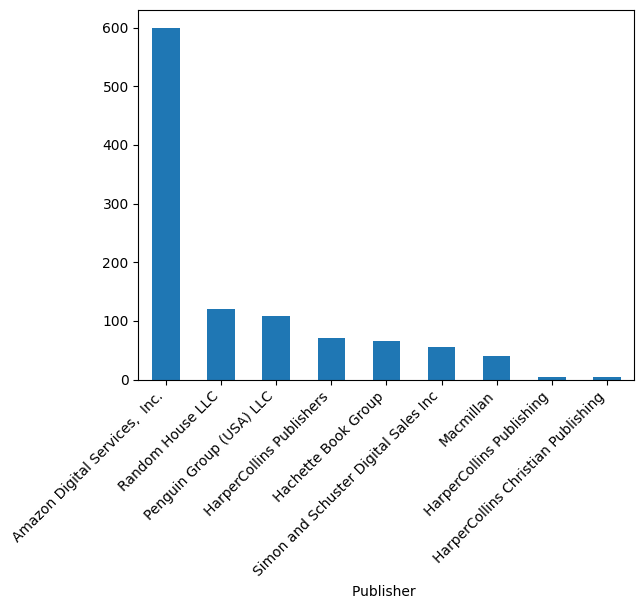

In [ ]:
df['Publisher '].value_counts().plot(kind='bar') #initial plot
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
df.isna().sum() #total rows with null

,0
index,0
Publishing Year,1
Book Name,23
Author,0
language_code,53
Author_Rating,0
Book_average_rating,0
Book_ratings_count,0
genre,0
gross sales,0


In [ ]:
df = df.dropna(subset=['Publishing Year', 'Book Name'])#dropping vals in the cols
df.shape

(1047, 15)

**PUBLISHER V/S UNITS SOLD**

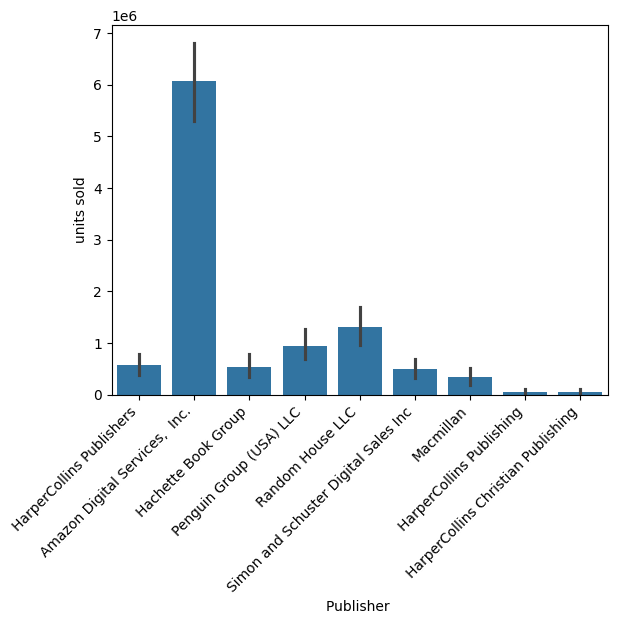

In [ ]:
sns.barplot(x='Publisher ', y='units sold', data=df, estimator=sum)#another one before reg
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
X = df[['units sold']] #publisher revenue regression based on units sold
y = df['publisher revenue']

SLRModel = LinearRegression()
SLRModel.fit(X, y)

intercept = SLRModel.intercept_
print('Intercept: ')
print('%.3f' % intercept + " ")

slope = SLRModel.coef_
print('Slope: ')
print(slope)

score = SLRModel.score(X, y)
print('Score: ')
print('%.3f' % score + " ")

y_pred = SLRModel.predict(X)
df["revenue prediction"] = y_pred

Intercept: 
1008.544 
Slope: 
[-0.01707794]
Score: 
0.014 


In [ ]:
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold,revenue prediction
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000,888.998350
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250,901.806808
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500,914.615266
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500,914.615266
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750,927.423724


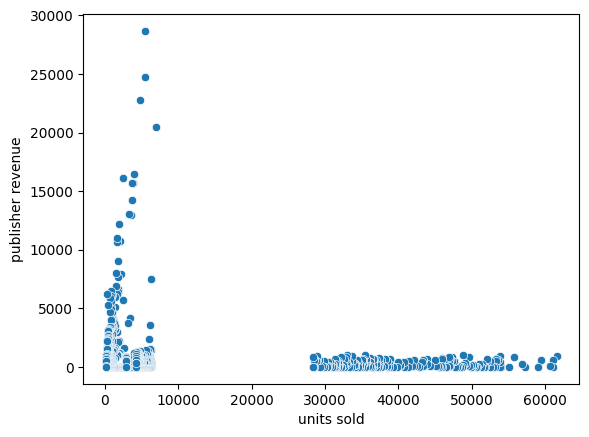

In [ ]:
sns.scatterplot(x='units sold', y='publisher revenue', data=df) #very interesting
plt.show()

**Author rating v/s units sold**

In [ ]:
df['Author_Rating'].unique()

array(['Novice', 'Intermediate', 'Famous', 'Excellent'], dtype=object)

In [ ]:
df['Author_Rating'] = df['Author_Rating'].astype(str) #obj to str
df['Author_Rating'] = df['Author_Rating'].str.strip()#getting rid of weird spacing
df['Author_Rating'] = df['Author_Rating'].map({'Novice':0, 'Intermediate':1, 'Famous':2, 'Excellent':3}) #numerical val
#df['Author_Rating'].unique()
#X = df[['Author_Rating']].values.ravel().astype(int) #numpy disrupting
X = df['Author_Rating'].fillna(-1).astype(int).values.reshape(-1,1) #needs to be 2d
y = df['units sold'].values
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold,revenue prediction
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,0,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000,888.998350
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,1,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250,901.806808
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,0,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500,914.615266
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,1,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500,914.615266
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,1,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750,927.423724


In [ ]:
SLRModel2 = LinearRegression() #regression for units sold based on author rating
SLRModel2.fit(X, y)

intercept = SLRModel2.intercept_
print('Intercept: ')
print('%.3f' % intercept + " ")

slope = SLRModel2.coef_
print('Slope: ')
print(slope)

score = SLRModel2.score(X, y)
print('Score: ')
print('%.3f' % score + " ")

units_pred = SLRModel2.predict(X)
df["units prediction"] = units_pred

Intercept: 
5360.853 
Slope: 
[2541.69307816]
Score: 
0.026 


In [ ]:
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold,revenue prediction,units prediction
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,0,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000,888.998350,5360.852969
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,1,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250,901.806808,7902.546047
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,0,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500,914.615266,5360.852969
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,1,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500,914.615266,7902.546047
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,1,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750,927.423724,7902.546047


<Axes: xlabel='Author_Rating', ylabel='units sold'>

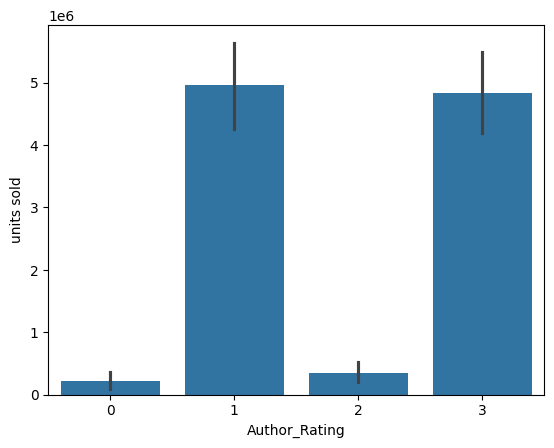

In [ ]:
sns.barplot(x='Author_Rating', y='units sold', data=df, estimator=sum)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   int64  
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
 15  revenue prediction   1070 non-null   f

In [ ]:
from google.colab import files

df.to_csv("cleaned_data.csv", index=False)
files.download("cleaned_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>